In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from skimage import io
from skimage import img_as_float

In [2]:
data = scio.loadmat("ex7data2")
X=data["X"]
m=X.shape[0]

In [3]:
# Select an initial set of centroids
k = 3  # Three centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [4]:
def find_closest_centroids(X, centroids):
    k=centroids.shape[0]
    m=X.shape[0]
    distances=np.zeros((m,k))
    J=np.zeros(m)
    for i in range(k):
        distances[:,i]=np.linalg.norm(X-centroids[i,:],axis=1)
        
    idx=np.argmin(distances,axis=1)
    idx=idx+1
    return idx


In [5]:
idx=find_closest_centroids(X,initial_centroids)

In [6]:
def compute_centroids(X, idx, K):
    (m, n) = X.shape
    centroids = np.zeros((K, n))    
    cluster1_inputs=X[np.where(idx==1)]
    cluster2_inputs=X[np.where(idx==2)]
    cluster3_inputs=X[np.where(idx==3)]

    centroids[0]=np.mean(cluster1_inputs,axis=0)
    centroids[1]=np.mean(cluster2_inputs,axis=0)
    centroids[2]=np.mean(cluster3_inputs,axis=0)
    return centroids
    


In [7]:
compute_centroids(X,idx,k)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [8]:
def kmeans_init_centroids(X, K):
    # You should return this value correctly
    centroids = np.zeros((K, X.shape[1]))
    random_indices=np.random.choice(X.shape[0],K)
    centroids=X[random_indices]
    return centroids

In [9]:
def plot_progress(X, centroids, previous, idx, K, i):
    plt.scatter(X[:, 0], X[:, 1], c=idx, s=15)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', s=25)

    for j in range(centroids.shape[0]):
        draw_line(centroids[j], previous[j])

    plt.title('Iteration number {}'.format(i + 1))


def draw_line(p1, p2):
    plt.plot(np.array([p1[0], p2[0]]), np.array([p1[1], p2[1]]), c='black', linewidth=1)

In [10]:
def run_kmeans(X, initial_centroids, max_iters, plot):
    if plot:
        plt.figure()

    # Initialize values
    (m, n) = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot:
            plot_progress(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx


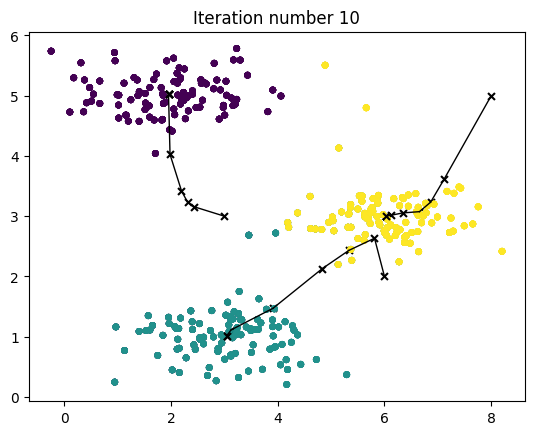

In [11]:
# ===================== Part 3: K-Means Clustering =====================
data = scio.loadmat('ex7data2.mat')
X = data['X']

K = 3
max_iters = 10

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

centroids, idx = run_kmeans(X, initial_centroids, max_iters, True)

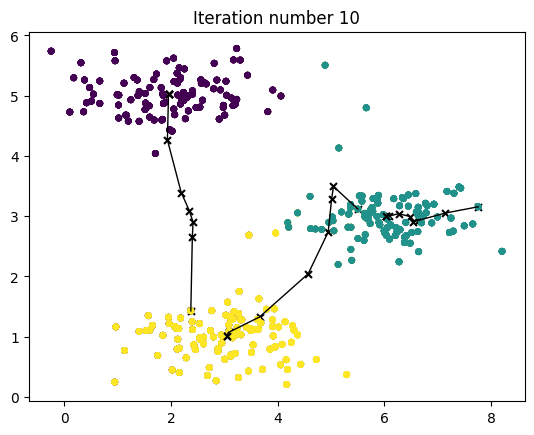

In [13]:
# ===================== Part 3: K-Means Clustering using random initial centroids=====================

K = 3
max_iters = 10

initial_centroids = kmeans_init_centroids(X,K)

centroids, idx = run_kmeans(X, initial_centroids, max_iters, True)

In [14]:
# ===================== Part 4: K-Means Clustering on Pixels =====================
# Load an image of a bird
image = io.imread('bird_small.png')
image = img_as_float(image)

# Size of the image
img_shape = image.shape
X = image.reshape(img_shape[0] * img_shape[1], 3)

# Run your K-Means algorithm on this data
K = 16
max_iters = 10


initial_centroids = kmeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kmeans(X, initial_centroids, max_iters, False)

Text(0.5, 1.0, 'Compressed, with 16 colors')

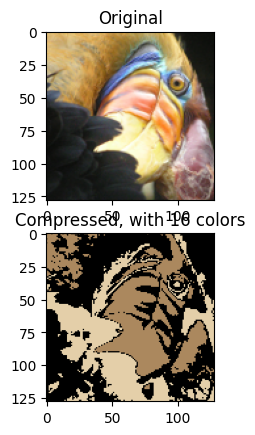

In [15]:
# Find closest cluster members
idx = find_closest_centroids(X, centroids)
X_recovered = centroids[idx]
# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_shape[0], img_shape[1], 3))

plt.subplot(2, 1, 1)
plt.imshow(image)
plt.title('Original')

plt.subplot(2, 1, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with {} colors'.format(K))